## Problem statement
Given a dataset, or in this case two datasets that deal with physicochemical properties of wine, we are to
predict the wine type and quality.

To summarize our main objectives, we will be trying to solve the following major problems by 
leveraging Machine Learning and data analysis on our wine quality dataset.
 - Predict if each wine sample is a red or white wine.
 - Predict the quality of each wine sample, which can be low, medium, or high.

# Exploratory Data Analysis

IMPORTING REQUIRED MODEL

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

### Reading Dataset

In [28]:
df_red = pd.read_csv ("winequality-red.csv", sep = ";")
df_white = pd.read_csv ("winequality-white.csv", sep = ";")

## Transforming and merging dataset

In [48]:
# Creating wine type Feature
df_red["wine_type"] = "red"
df_white["wine_type"] = "white"

# bucket wine type score into qualitative quality labels
## for red wine
df_red["quality_label"] = df_red["quality"].apply (lambda x: "low" if x <= 5 else "medium"
                                                   if x <= 7 else "high")
df_red["quality_label"] = pd.Categorical (df_red["quality_label"], 
                                          categories = ['low', 'medium', 'high'])

## for white wine
df_white["quality_label"] = df_white["quality"].apply (lambda x: "low" if x <= 5 else "medium"
                                                       if x <= 7 else "high")
df_white["quality_label"] = pd.Categorical (df_white["quality_label"], categories = ['low', 'medium', 'high'])

# merge red and white wine dataset
wines_df = pd.concat ([df_red, df_white], axis = 0)

# re-shuffle records just to randomize data points
wines_df = wines_df.sample (frac = 1, random_state = 42).reset_index (drop = True)

In [51]:
wines_df.head ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


## Descriptive Statistics

In [72]:
subset = ['residual sugar', 'total sulfur dioxide', 'sulphates', 
          'alcohol', 'volatile acidity', 'quality']

# By Wine Type
rs = round (df_red[subset].describe (), 2)
ws = round (df_white[subset].describe (), 2)
pd.concat ([rs, ws], axis = 1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

In [74]:
# By Quality Label
ls = round (wines_df[(wines_df.quality_label == "low")][subset].describe (), 2)
ms = round (wines_df[(wines_df.quality_label == "medium")][subset].describe (), 2)
hs = round (wines_df[(wines_df.quality_label == "high")][subset].describe (), 2)
pd.concat ([ls, ms, hs], axis = 1, keys = ['Low Quality Wine', 'Medium Quality Wine',
                                            'High Quality Wine'])

Low Quality Wine                                          \
        residual sugar total sulfur dioxide sulphates  alcohol   
count          2384.00              2384.00   2384.00  2384.00   
mean              5.65               119.28      0.52     9.87   
std               4.92                61.89      0.14     0.84   
min               0.60                 6.00      0.25     8.00   
25%               1.80                68.00      0.44     9.30   
50%               2.90               124.00      0.50     9.60   
75%               8.52               167.00      0.58    10.40   
max              23.50               440.00      2.00    14.90   

                                Medium Quality Wine                       \
      volatile acidity  quality      residual sugar total sulfur dioxide   
count          2384.00  2384.00             3915.00              3915.00   
mean              0.40     4.88                5.32               113.51   
std               0.19     0.36                4.68                53.57   
min               0.10     3.00                0.70                 6.00   
25%               0.26     5.00                1.80                81.00   
50%               0.34     5.00                3.00               116.00   
75%               0.50     5.00                7.90               150.00   
max               1.58     5.00               65.80               294.00   

                                                   High Quality Wine  \
      sulphates  alcohol volatile acidity  quality    residual sugar   
count   3915.00  3915.00          3915.00  3915.00            198.00   
mean       0.54    10.81             0.31     6.28              5.35   
std        0.15     1.20             0.14     0.45              4.16   
min        0.22     8.40             0.08     6.00              0.80   
25%        0.43     9.80             0.21     6.00              2.00   
50%        0.51    10.80             0.27     6.00              4.05   
75%        0.61    11.70             0.36     7.00              7.57   
max        1.95    14.20             1.04     7.00             14.80   

                                                                       
      total sulfur dioxide sulphates alcohol volatile acidity quality  
count               198.00    198.00  198.00           198.00  198.00  
mean                117.48      0.51   11.69             0.29    8.03  
std                  41.69      0.16    1.27             0.12    0.16  
min                  12.00      0.25    8.50             0.12    8.00  
25%                  96.00      0.38   11.00             0.21    8.00  
50%                 118.50      0.48   12.00             0.28    8.00  
75%                 145.00      0.60   12.60             0.35    8.00  
max                 212.50      1.10   14.00             0.85    9.00

## Inferential Statistics
inferential statistics is used to draw inferences of a population using a 
data sample.
  - Checking if mean alcohol levels or pH levels vary significantly among the data Quality_label (low, medium, high).
  
null hypothesis is that the group means for low, medium, and high 
quality wine is same.

alternate hypothesis would be that there is a difference (statistically significant) between at least two group means

NB: p-value and t-value is mainly used for inferential statistics.

p-value <= 0.05 (5%) means there is high correlation between the variables


p-value >= 0.05 (5%) means there is no correlation between the variables

In [101]:
from scipy import stats

# for Alcohol
f, p = stats.f_oneway (wines_df[(wines_df.quality_label == "low")]["alcohol"],
                       wines_df[(wines_df.quality_label == "medium")]["alcohol"],
                       wines_df[(wines_df.quality_label == "high")]["alcohol"])
print ("ANOVA test for mean alcohol levels across wine samples with different quality ratings\n")
print ("F Statistic: ", round (f, 3), "\tP value: ", p)


ANOVA test for mean alcohol levels across wine samples with different quality ratings

F Statistic:  673.075 	P value:  2.2715337450621843e-266


Observation:  p-value is far less than 0.05 meaning our hypothesis is alternate

In [99]:
# for PH values

f, p = stats.f_oneway (wines_df[(wines_df.quality_label == "low")]["pH"],
                       wines_df[(wines_df.quality_label == "medium")]["pH"],
                       wines_df[(wines_df.quality_label == "high")]["pH"])

print ("ANOVA test for mean pH values across wine samples with different quality ratings\n")
print ("F Statistic: ", round (f, 3), "\tP value: ", round (p, 3))


ANOVA test for mean pH values across wine samples with different quality ratings

F Statistic:  1.236 	P value:  0.291


Observation:  p-value is greater 0.05 meaning our hypothesis is null

Text(0, 0.5, 'Wine pH')

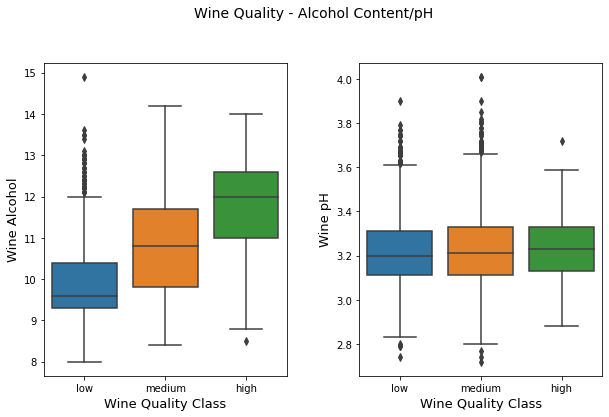

In [114]:
# visualising it using boxplot
fig, (ax1, ax2) = plt.subplots (1, 2, figsize = (10, 6))
plt.suptitle ("Wine Quality - Alcohol Content/pH", fontsize = 14)
fig.subplots_adjust (top = 0.85, wspace = 0.3)

sns.boxplot (x = "quality_label", y = "alcohol", data = wines_df, ax = ax1)
ax1.set_xlabel ("Wine Quality Class", size = 13, alpha = 1)
ax1.set_ylabel ("Wine Alcohol", size = 13, alpha = 1)

sns.boxplot (x = "quality_label", y = "pH", data = wines_df, ax = ax2)
ax2.set_xlabel ("Wine Quality Class", size = 13, alpha = 1)
ax2.set_ylabel ("Wine pH", size = 13, alpha = 1)

Observation:
  - The Alcohol content increases with increase in wine Quality class
  - The pH nearly remains constant for all wine Quality class (insignificant difference)

## Univariate Analysis
Univariate analysis means anlysing only one variable or feature. No relationship or correlation are analyzed among multiple variables.

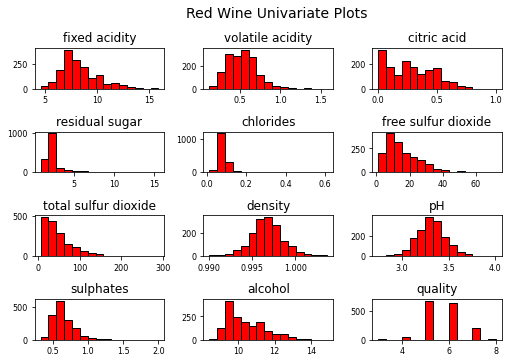

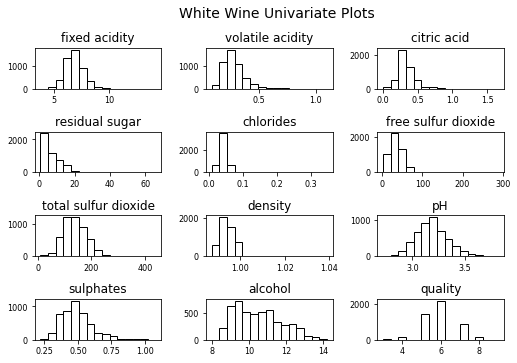

In [118]:
# for red wine
df_red.hist (bins = 15, color = "red", edgecolor = "black", linewidth = 1.0,
             xlabelsize = 8, ylabelsize = 8, grid = False)
plt.tight_layout (rect = (0, 0, 1.2, 1.2))
rt = plt.suptitle('Red Wine Univariate Plots', x = 0.65, y = 1.25,
                    fontsize = 14)
# for white wine
df_white.hist (bins = 15, color = "white", edgecolor = "black", linewidth = 1.0,
               xlabelsize = 8, ylabelsize = 8, grid = False)
plt.tight_layout (rect = (0, 0, 1.2, 1.2))
rt = plt.suptitle("White Wine Univariate Plots", x = 0.65, y = 1.25,
                    fontsize = 14)

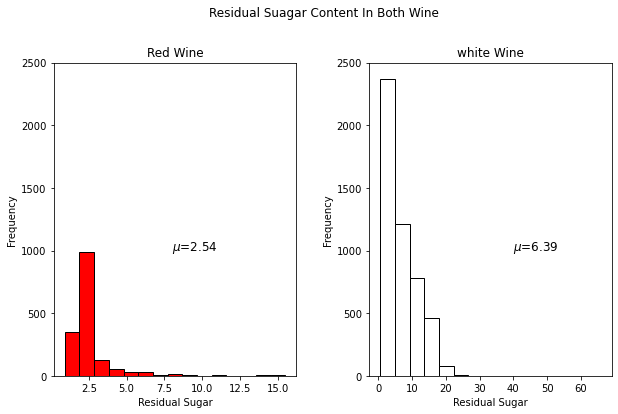

In [160]:
# Observing Residual sugar histogram of both wine
fig = plt.figure (figsize = (10, 6))
title = fig.suptitle ("Residual Suagar Content In Both Wine")
fig.subplots_adjust (top = 0.85, wspace = 0.3)

# for red wine
ax1 = plt.subplot (1, 2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Residual Sugar")
ax1.set_ylabel("Frequency")
ax1.set_ylim ([0, 2500])
ax1.text (8, 1000, r'$\mu$='+str(round(df_red['residual sugar'].mean(),2)),
          fontsize = 12)
r_freq, r_bins, r_patches = ax1.hist (df_red['residual sugar'], color = 'red',
                                      bins=15, edgecolor = 'black', linewidth = 1)

# for white wine
ax2 = plt.subplot (1, 2, 2)
ax2.set_title("white Wine")
ax2.set_xlabel("Residual Sugar")
ax2.set_ylabel("Frequency")
ax2.set_ylim ([0, 2500])
ax2.text (40, 1000, r'$\mu$='+str(round(df_white['residual sugar'].mean(), 2)),
          fontsize = 12)
w_freq, w_bins, w_patches = ax2.hist (df_white['residual sugar'], color = 'white',
                                      bins=15, edgecolor = 'black', linewidth = 1)



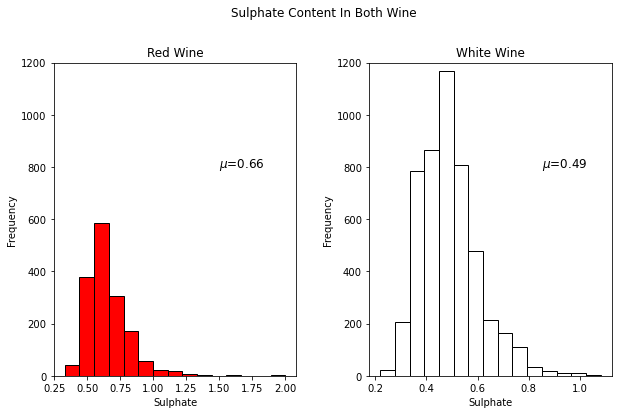

In [161]:
# Observing sulphate histogram for both wine
fig = plt.figure (figsize = (10, 6))
title = fig.suptitle ("Sulphate Content In Both Wine")
fig.subplots_adjust (top = 0.85, wspace = 0.3)

# for red wine
ax1 = plt.subplot (1, 2, 1)
ax1.set_xlabel ("Sulphate")
ax1.set_ylabel ("Frequency")
ax1.set_title ("Red Wine")
ax1.set_ylim ([0, 1200])
ax1.text (1.5, 800, r'$\mu$='+str(round(df_red['sulphates'].mean(), 2)),
          fontsize = 12)
r_freq, r_bins, r_patches = ax1.hist (df_red["sulphates"], color = "red", bins = 15, edgecolor = "black", linewidth = 1)

# for white wine
ax2 = plt.subplot (1, 2, 2)
ax2.set_xlabel ("Sulphate")
ax2.set_ylabel ("Frequency")
ax2.set_title ("White Wine")
ax2.set_ylim ([0, 1200])
ax2.text (0.85, 800, r'$\mu$='+str(round(df_white['sulphates'].mean(), 2)),
          fontsize = 12)
w_freq, w_bins, w_patches = ax2.hist (df_white["sulphates"], color = "white", bins = 15, edgecolor = "black", linewidth = 1)


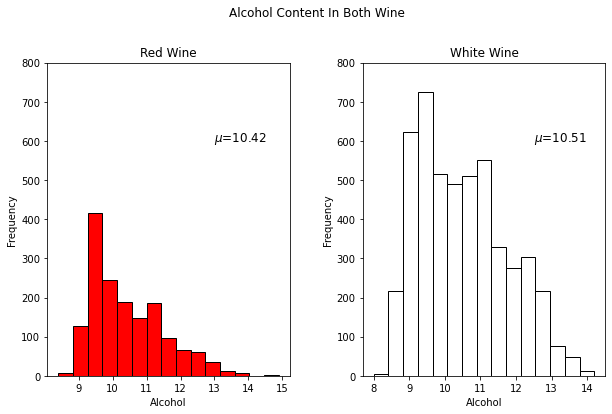

In [162]:
# Observing Alcohol Content histogram for both wine
fig = plt.figure (figsize = (10, 6))
title = fig.suptitle ("Alcohol Content In Both Wine")
fig.subplots_adjust (top = 0.85, wspace = 0.3)

# for red wine
ax1 = plt.subplot (1, 2, 1)
ax1.set_xlabel ("Alcohol")
ax1.set_ylabel ("Frequency")
ax1.set_title ("Red Wine")
ax1.set_ylim ([0, 800])
ax1.text (13, 600, r'$\mu$='+str(round(df_red['alcohol'].mean(), 2)),
          fontsize = 12)
r_freq, r_bins, r_patches = ax1.hist (df_red["alcohol"], color = "red", bins = 15, edgecolor = "black", linewidth = 1)

# for white wine
ax2 = plt.subplot (1, 2, 2)
ax2.set_xlabel ("Alcohol")
ax2.set_ylabel ("Frequency")
ax2.set_title ("White Wine")
ax2.set_ylim ([0, 800])
ax2.text (12.5, 600, r'$\mu$='+str(round(df_white['alcohol'].mean(), 2)),
          fontsize = 12)
w_freq, w_bins, w_patches = ax2.hist (df_white["alcohol"], color = "white", bins = 15, edgecolor = "black", linewidth = 1)


## Multivariate Analysis
Analyzing multiple feature variables and their relationships is what multivariate analysis is all about

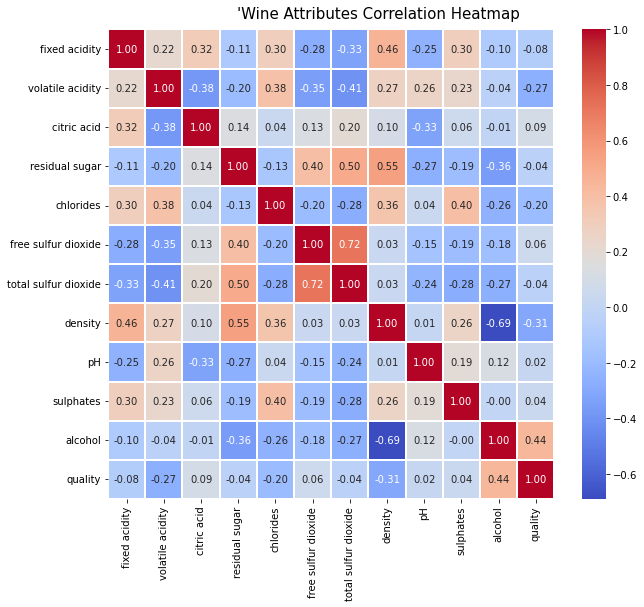

In [204]:
# Building a heatmap
f, ax = plt.subplots (figsize = (10, 8))
corr = round (wines_df.corr (), 2)
hm = sns.heatmap (corr, annot = True, ax = ax, cmap = "coolwarm", 
                   fmt = ".2f", linewidth = 0.2)
f.subplots_adjust (top = 0.94)
t = f.suptitle ("'Wine Attributes Correlation Heatmap", fontsize = 15)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


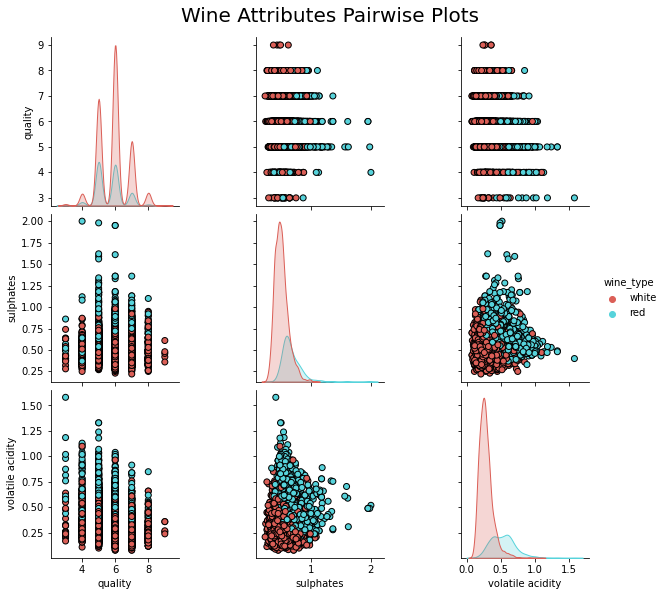

In [239]:
# Pairwise Plots
cols = ["wine_type", "quality", "sulphates", "volatile acidity"]
pp = sns.pairplot (wines_df[cols], hue = "wine_type", diag_kind = "kde", size = 2.8,
                   palette = "hls",
                   plot_kws = dict (edgecolor = "black", linewidth = 1))
fig = pp.fig
fig.subplots_adjust (top = 0.93, wspace = 0.6)
t = fig.suptitle ('Wine Attributes Pairwise Plots', fontsize = 20)


Obsevation from the plot:
 - Presence of higher sulphate levels in red wines as compared to white wines
 - Lower sulphate levels in wines with high quality ratings
 - Lower levels of volatile acids in wines with high quality ratings
 - Presence of higher volatile acid levels in red wines as compared to white wines

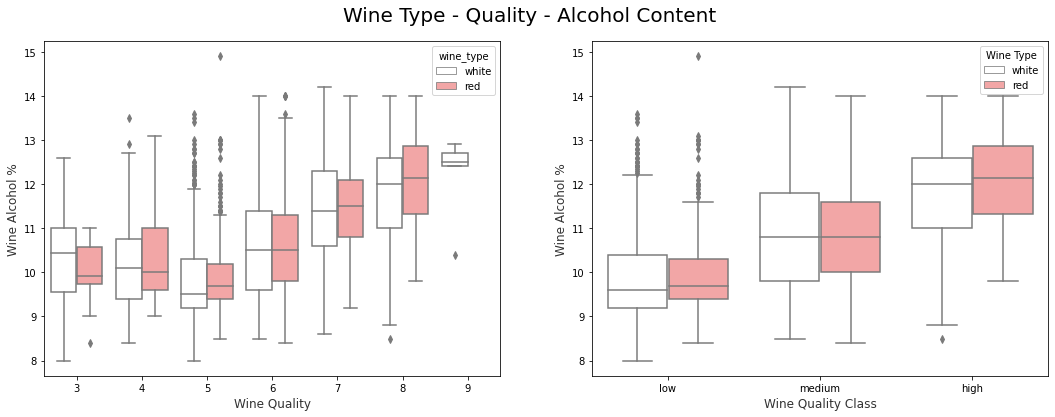

In [250]:
# Boxplot for wine alcohol content versus both wine quality and quality_label
fig, (ax1, ax2) = plt.subplots (1, 2, figsize = (18, 6))
fig.suptitle ("Wine Type - Quality - Alcohol Content", fontsize = 20)
fig.subplots_adjust (top = 0.9, wspace = 0.2)

sns.boxplot (x = "quality", y = "alcohol", hue = "wine_type", data = wines_df,
             palette = {"red": "#FF9999", "white": "white"}, ax = ax1)
ax1.set_xlabel ("Wine Quality", fontsize = 12, alpha = 0.8)
ax1.set_ylabel ("Wine Alcohol %", fontsize = 12, alpha = 0.8)

sns.boxplot (x = "quality_label", y = "alcohol", hue = "wine_type", 
             data = wines_df, palette = {"red": "#FF9999", "white": "white"}, ax = ax2)
ax2.set_xlabel ("Wine Quality Class", fontsize = 12, alpha = 0.8)
ax2.set_ylabel ("Wine Alcohol %", fontsize = 12, alpha = 0.8)
l = plt.legend (loc = "best", title = "Wine Type")

Text(0, 0.5, 'Wine Fixed Acidity')

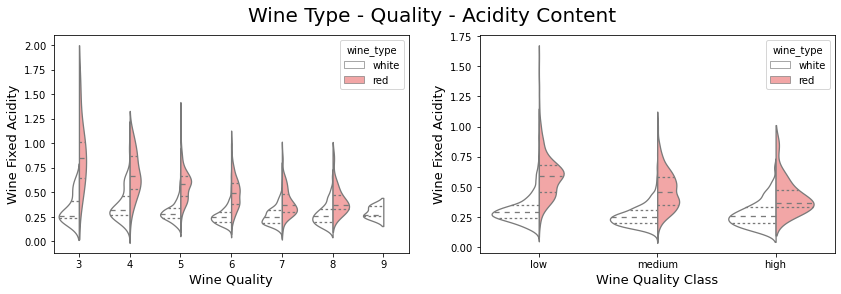

In [253]:
# Violinplot of Wine Quality versus Fixed acidity
fig, (ax1, ax2) = plt.subplots (1, 2, figsize = (14, 4))
fig.suptitle ("Wine Type - Quality - Acidity Content", fontsize = 20)

# Acidity Content vs Quality
sns.violinplot (x = "quality", y = "volatile acidity", hue = "wine_type",
                data = wines_df, split = True, inner = "quart", linewidth = 1.3,
                palette = {"red": "#FF9999", "white": "white"}, ax = ax1)
ax1.set_xlabel ("Wine Quality", fontsize = 13)
ax1.set_ylabel ("Wine Fixed Acidity", fontsize = 13)

# Acidity Content Vs Quality Class
sns.violinplot (x = "quality_label", y = "volatile acidity", hue = "wine_type",
                data = wines_df, split = True, inner = "quart", linewidth = 1.3,
                palette = {"red": "#FF9999", "white": "white"}, ax = ax2)
ax2.set_xlabel ("Wine Quality Class", fontsize = 13)
ax2.set_ylabel ("Wine Fixed Acidity", fontsize = 13)